# 3.3 示例数据集

In [16]:
from sklearn import datasets

## 3.3.1 小型数据集

Toy Datasets, sklearn自带，用于示例、验证。

datasets.load_*()

In [17]:
from  sklearn.datasets import load_iris
data = load_iris()
dir(data)# 查看data对象成员信息

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

其中DESCR为数据集描述文本信息，data为特征数据，target为标签数据，feature_names为各维特征的名称，target_names为标签名称，filename为数据在本地的存储位置。以下代码可打印相关信息：

In [18]:
print(data.feature_names, data.target_names)  # 显示各维特征和标签名称
print(data.data.shape, data.target.shape)  # 显示特征数据和标签数据形状
print(data.filename)  # 显示数据在本地的存储位置
print(data.DESCR)  # 显示数据集描述文本信息

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)
iris.csv
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.7

In [19]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
digit = load_digits()
gs = gridspec.GridSpec(5, 10)
fig = plt.figure()

for i, data in enumerate(zip(digit.data[:50], digit.target[:50])):
    ax = fig.add_subplot(gs[i // 10, i % 10], title=str(data[1]))
    # 不显示横坐标和纵坐标
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(data[0].reshape((8, 8)), cmap=plt.cm.gray_r)  # 灰度图形显示

<IPython.core.display.Javascript object>

原始书中的代码已弃用，改用gridspec

## 3.3.2 真实世界数据集
需要先下载再使用
datasets.fetch_*()

以下以Olivetti人脸数据集为例

In [20]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
dir(faces)

['DESCR', 'data', 'images', 'target']

In [21]:
print(faces.data.shape, faces.target.shape)

(400, 4096) (400,)


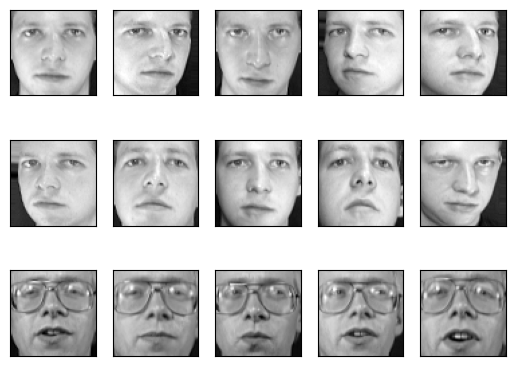

In [28]:
# 课本原版

%matplotlib inline
from matplotlib import pyplot as plt
plt.subplots(3, 5)  # 图像包含3行5列，共15个子图，每个子图显示一张人脸图像
for i, comp in enumerate(faces.data[:15]):  # 显示前15张人脸,其中前10张为同一人
    plt.subplot(3, 5, i + 1)
    plt.xticks([])  # 不显示横坐标
    plt.yticks([])  # 不显示总坐标
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray)  # 按灰度图显示图像

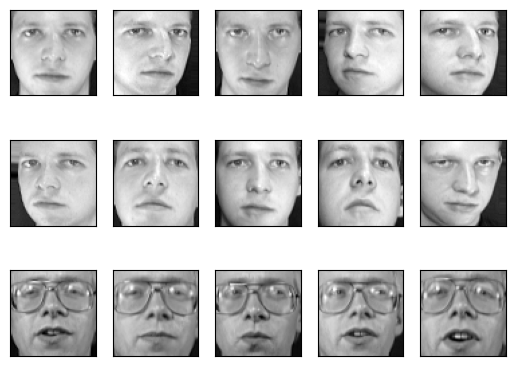

In [35]:
# 按照上面的gridspec修改

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3,5)
fig = plt.figure()

for i, comp in enumerate(faces.data[:15]):
    ax = fig.add_subplot(gs[i // 5, i%5])
    # 不显示横坐标和纵坐标
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(comp.reshape((64,64)),cmap=plt.cm.gray)


## 3.3.3 算法生成数据集
设置参数生成
datasets.make_*()

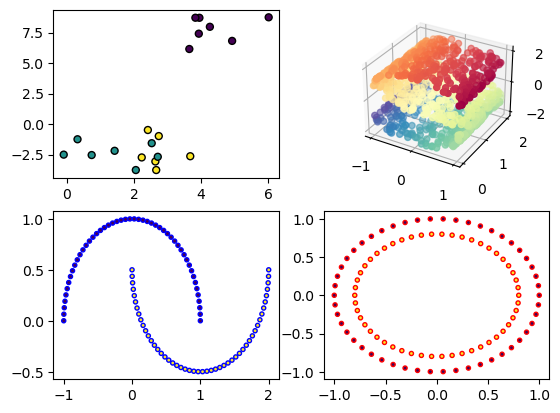

In [36]:
%matplotlib inline
from sklearn import datasets
from matplotlib import pyplot as plt
fig = plt.figure()
X1, y1 = datasets.make_blobs(n_samples=20, centers=3, n_features=2)
ax = fig.add_subplot(221)  # 左上角子图
ax.scatter(X1[:, 0], X1[:, 1], marker="o", c=y1, s=25, edgecolor="k")
X2, y2 = datasets.make_s_curve(n_samples=1000)  # 生成S曲面
ax = fig.add_subplot(222, projection='3d')  # 在右上角三维空间子图中展示
ax.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2],  c=y2, cmap=plt.cm.Spectral)
X3, y3 = datasets.make_moons()
ax = fig.add_subplot(223)  # 左下角子图
ax.scatter(X3[:, 0], X3[:, 1], marker=".", c=y3, s=35, edgecolor="b")
X4, y4 = datasets.make_circles()
ax = fig.add_subplot(224)  # 右下角子图
ax.scatter(X4[:, 0], X4[:, 1], marker=".", c=y4, s=35, edgecolor="r")